In [1]:

import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot


In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
pea=pd.read_csv(r'D:\KAGGLE EVENT\train.csv')

In [4]:
pea

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,...,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,FormalWarnings,ProjectsContributed,Attrition,YearsAtCompany
0,1,44.0,Travel_Rarely,1376.0,Human Resources,1,Male,91.0,2.0,3,...,1098,2.0,3.0,6,3.0,6,0,15.0,1,20
1,2,25.0,Non-Travel,675.0,Research & Development,5,Male,85.0,4.0,2,...,369,2.0,3.0,3,1.0,5,0,7.0,0,6
2,3,57.0,Travel_Rarely,210.0,Sales,29,Male,56.0,2.0,4,...,568,1.0,2.0,0,0.0,0,0,3.0,0,1
3,4,47.0,Travel_Rarely,1180.0,Research & Development,25,Male,84.0,3.0,3,...,1993,1.0,3.0,14,12.0,11,0,14.0,0,17
4,5,22.0,Travel_Rarely,391.0,Research & Development,7,Male,75.0,3.0,1,...,1878,4.0,3.0,0,0.0,0,0,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1226,29.0,Travel_Rarely,806.0,Research & Development,7,Female,39.0,3.0,1,...,1299,2.0,3.0,7,7.0,7,0,20.0,1,7
1226,1227,41.0,Travel_Rarely,582.0,Research & Development,28,Female,60.0,2.0,4,...,2034,1.0,3.0,7,0.0,10,0,9.0,0,20
1227,1228,36.0,Travel_Rarely,1456.0,Sales,13,Male,96.0,2.0,2,...,1733,2.0,3.0,2,2.0,2,0,15.0,1,2
1228,1229,23.0,Travel_Rarely,885.0,Research & Development,4,Male,58.0,4.0,1,...,705,1.0,4.0,2,0.0,2,0,15.0,0,3


In [5]:
pea['Attrition']

0       1
1       0
2       0
3       0
4       1
       ..
1225    1
1226    0
1227    1
1228    0
1229    1
Name: Attrition, Length: 1230, dtype: int64

In [6]:
pea.groupby('Attrition').size()

Attrition
0    1033
1     197
dtype: int64

In [7]:
pea.groupby('Attrition').sum()

,ID,Age,DailyRate,DistanceFromHome,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,FormalWarnings,ProjectsContributed,YearsAtCompany
Attrition,,,,,,,,,,,,,,,,,,,,,
0,628625,38626.0,828238.0,9261,68276.0,2853.0,2223,2863.0,7094217,14857817.0,...,1033,1234784,2865.0,2874.0,4563,2281.0,4462,0,13380.0,7565
1,128440,6596.0,147026.0,2095,12805.0,507.0,323,472.0,944199,2826527.0,...,197,232956,482.0,526.0,568,388.0,555,0,2397.0,994


In [8]:
pea.shape

(1230, 44)

In [9]:
pea.size

54120

In [10]:
pea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1230 non-null   int64  
 1   Age                       1229 non-null   float64
 2   BusinessTravel            1230 non-null   object 
 3   DailyRate                 1229 non-null   float64
 4   Department                1230 non-null   object 
 5   DistanceFromHome          1230 non-null   int64  
 6   Gender                    1230 non-null   object 
 7   HourlyRate                1228 non-null   float64
 8   JobInvolvement            1229 non-null   float64
 9   JobLevel                  1230 non-null   int64  
 10  JobRole                   1230 non-null   object 
 11  JobSatisfaction           1229 non-null   float64
 12  MaritalStatus             1230 non-null   object 
 13  MonthlyIncome             1230 non-null   int64  
 14  MonthlyR

In [11]:
pea['Attrition'].unique()

array([1, 0], dtype=int64)

In [12]:
pea.isnull().sum()

ID                          0
Age                         1
BusinessTravel              0
DailyRate                   1
Department                  0
DistanceFromHome            0
Gender                      0
HourlyRate                  2
JobInvolvement              1
JobLevel                    0
JobRole                     0
JobSatisfaction             1
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 1
NumCompaniesWorked          1
Over18                      0
OverTime                    0
PercentSalaryHike           1
PerformanceRating           0
CommunicationSkill          0
Behaviour                   0
Experience                  0
LvlGrownInOrg               1
ContributionIndex           0
TechnicalExpertise          0
RelationshipSatisfaction    1
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           1
TrainingTimesLastYear       0
Education                   1
EducationField              0
EmployeeCo

In [13]:
pea['Attrition'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1225    False
1226    False
1227    False
1228    False
1229    False
Name: Attrition, Length: 1230, dtype: bool

In [14]:
pe=pea
pe.fillna(pe.mean(),inplace=True)


In [15]:
pe


,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,...,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,FormalWarnings,ProjectsContributed,Attrition,YearsAtCompany
0,1,44.0,Travel_Rarely,1376.0,Human Resources,1,Male,91.0,2.0,3,...,1098,2.0,3.0,6,3.0,6,0,15.0,1,20
1,2,25.0,Non-Travel,675.0,Research & Development,5,Male,85.0,4.0,2,...,369,2.0,3.0,3,1.0,5,0,7.0,0,6
2,3,57.0,Travel_Rarely,210.0,Sales,29,Male,56.0,2.0,4,...,568,1.0,2.0,0,0.0,0,0,3.0,0,1
3,4,47.0,Travel_Rarely,1180.0,Research & Development,25,Male,84.0,3.0,3,...,1993,1.0,3.0,14,12.0,11,0,14.0,0,17
4,5,22.0,Travel_Rarely,391.0,Research & Development,7,Male,75.0,3.0,1,...,1878,4.0,3.0,0,0.0,0,0,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1226,29.0,Travel_Rarely,806.0,Research & Development,7,Female,39.0,3.0,1,...,1299,2.0,3.0,7,7.0,7,0,20.0,1,7
1226,1227,41.0,Travel_Rarely,582.0,Research & Development,28,Female,60.0,2.0,4,...,2034,1.0,3.0,7,0.0,10,0,9.0,0,20
1227,1228,36.0,Travel_Rarely,1456.0,Sales,13,Male,96.0,2.0,2,...,1733,2.0,3.0,2,2.0,2,0,15.0,1,2
1228,1229,23.0,Travel_Rarely,885.0,Research & Development,4,Male,58.0,4.0,1,...,705,1.0,4.0,2,0.0,2,0,15.0,0,3


In [16]:
pe.isnull().sum()

ID                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
CommunicationSkill          0
Behaviour                   0
Experience                  0
LvlGrownInOrg               0
ContributionIndex           0
TechnicalExpertise          0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
Education                   0
EducationField              0
EmployeeCo

In [17]:
pe.shape

(1230, 44)

In [18]:
#Visualization

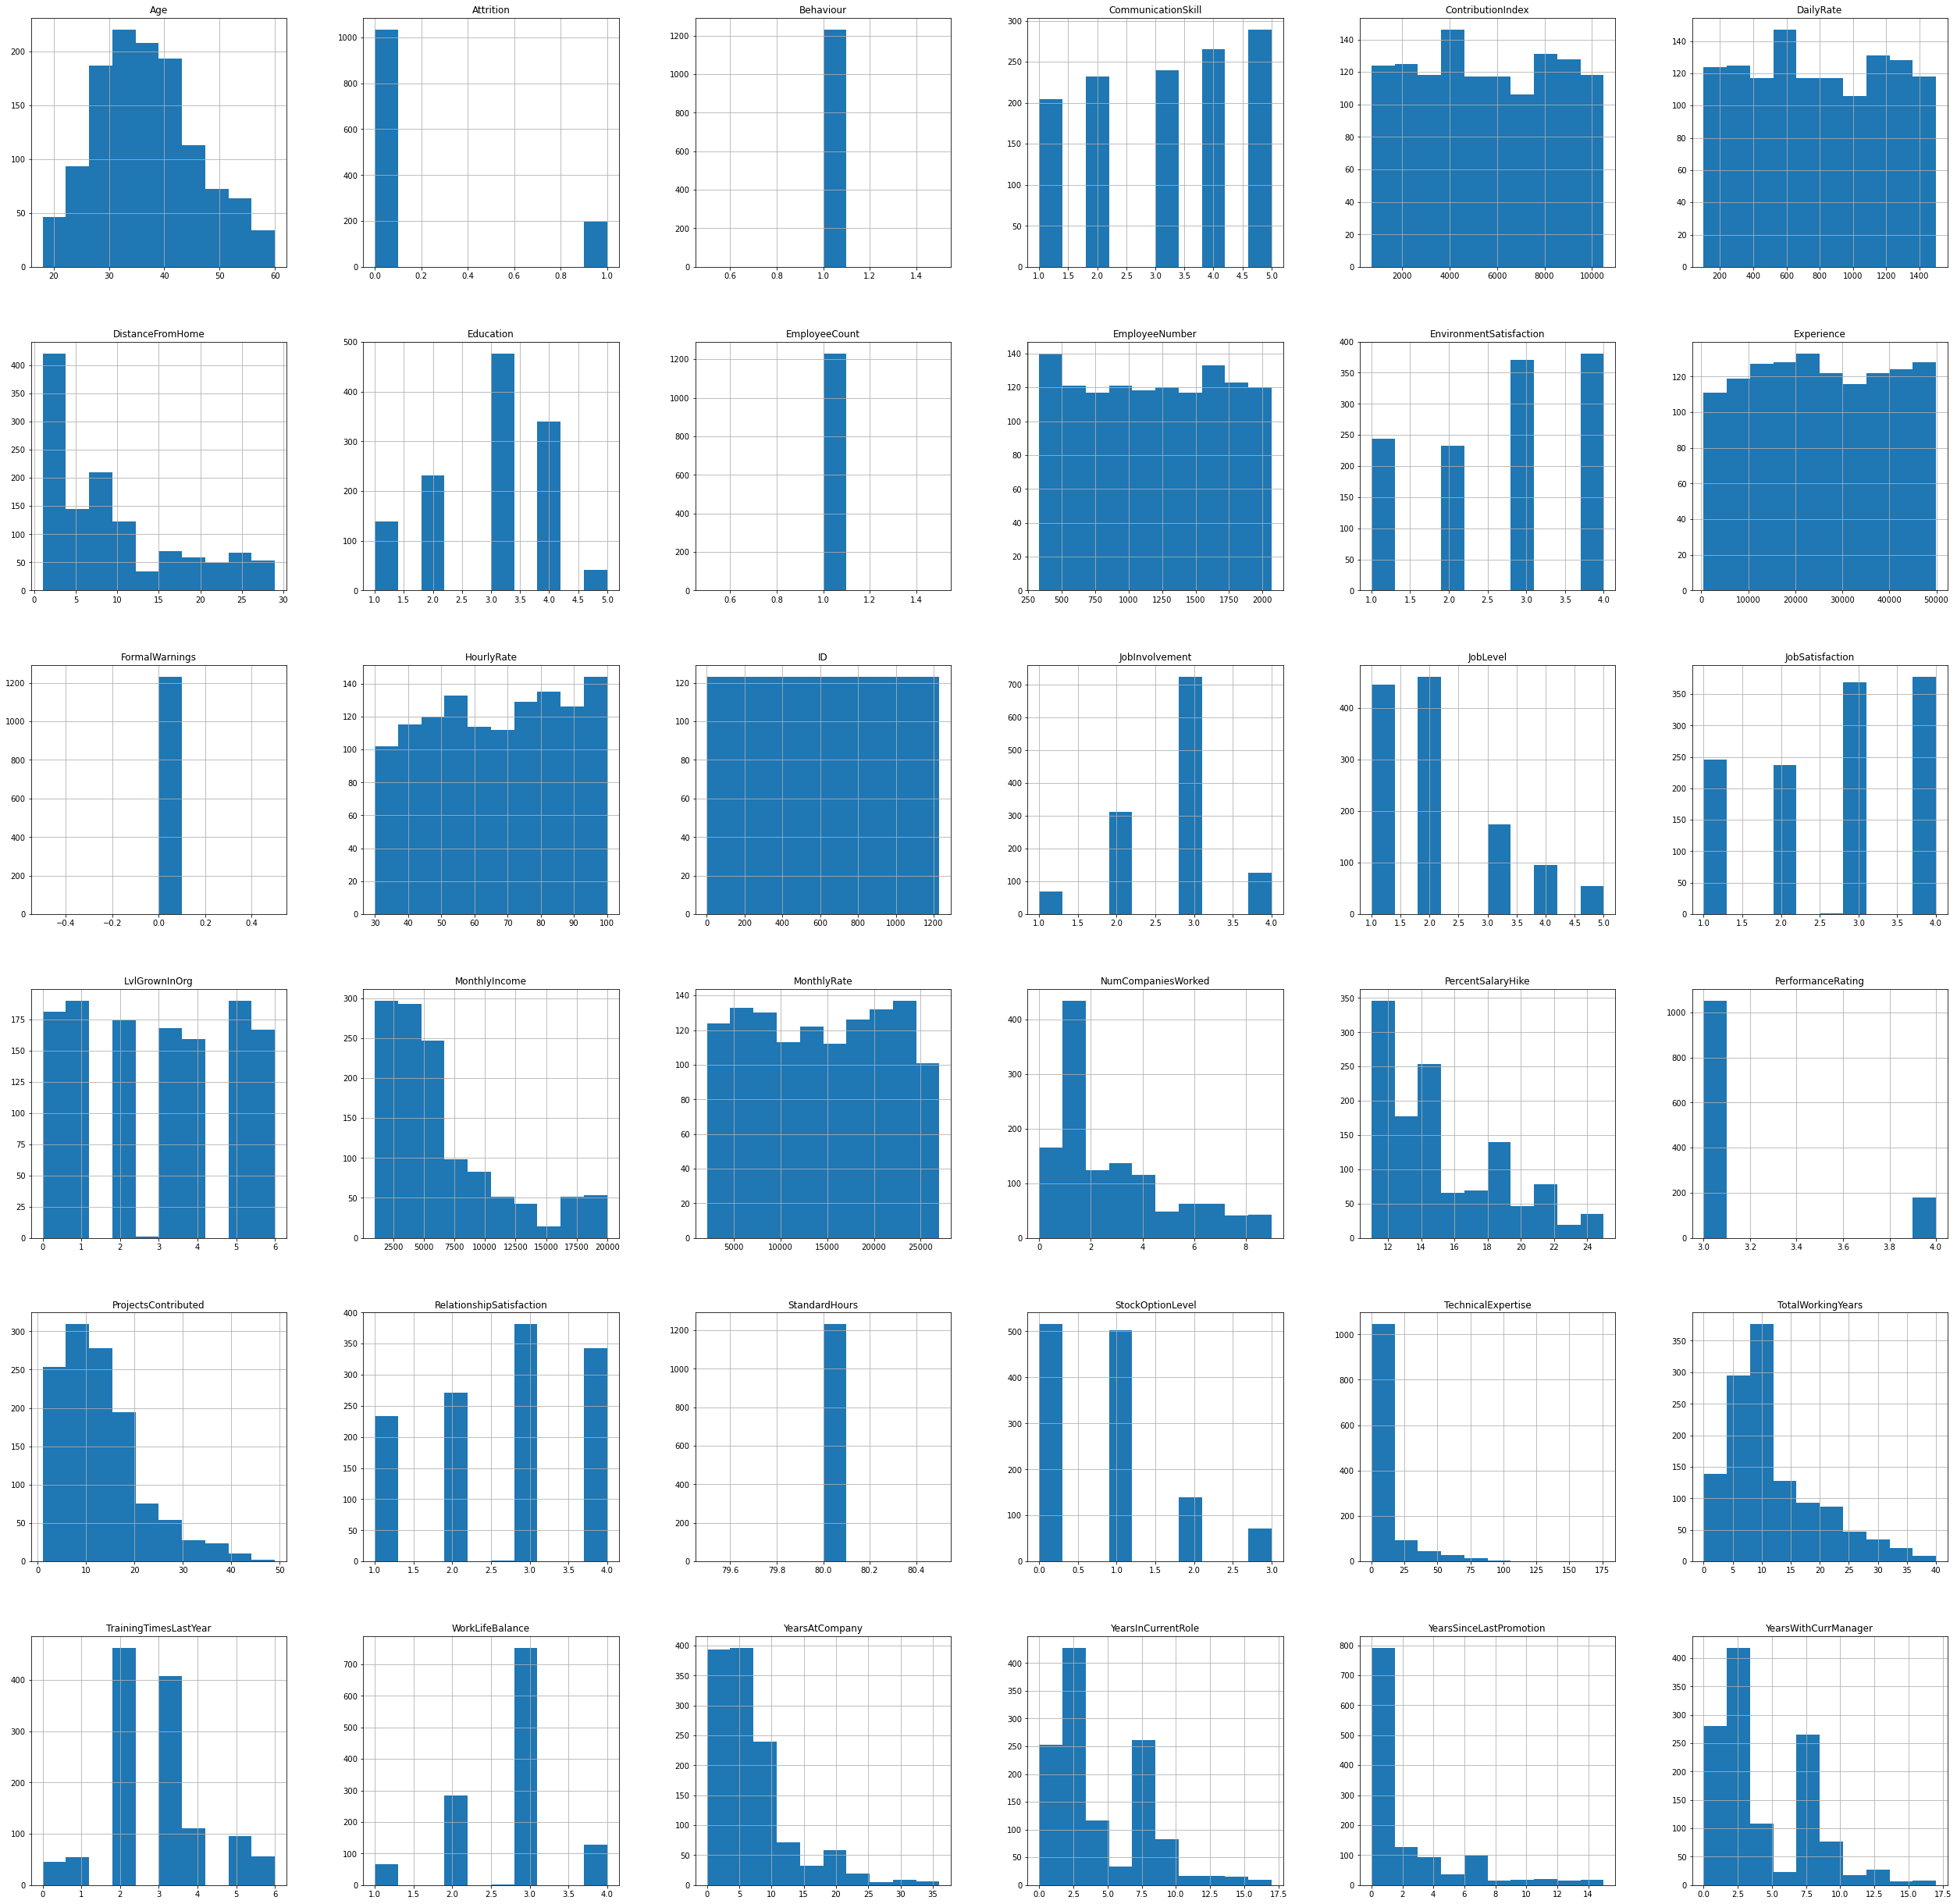

In [19]:
pe.hist(figsize=(44,44))
plt.show()

In [20]:
numeric_columns=['Age','DistanceFromHome','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','NumCompaniesWorked']

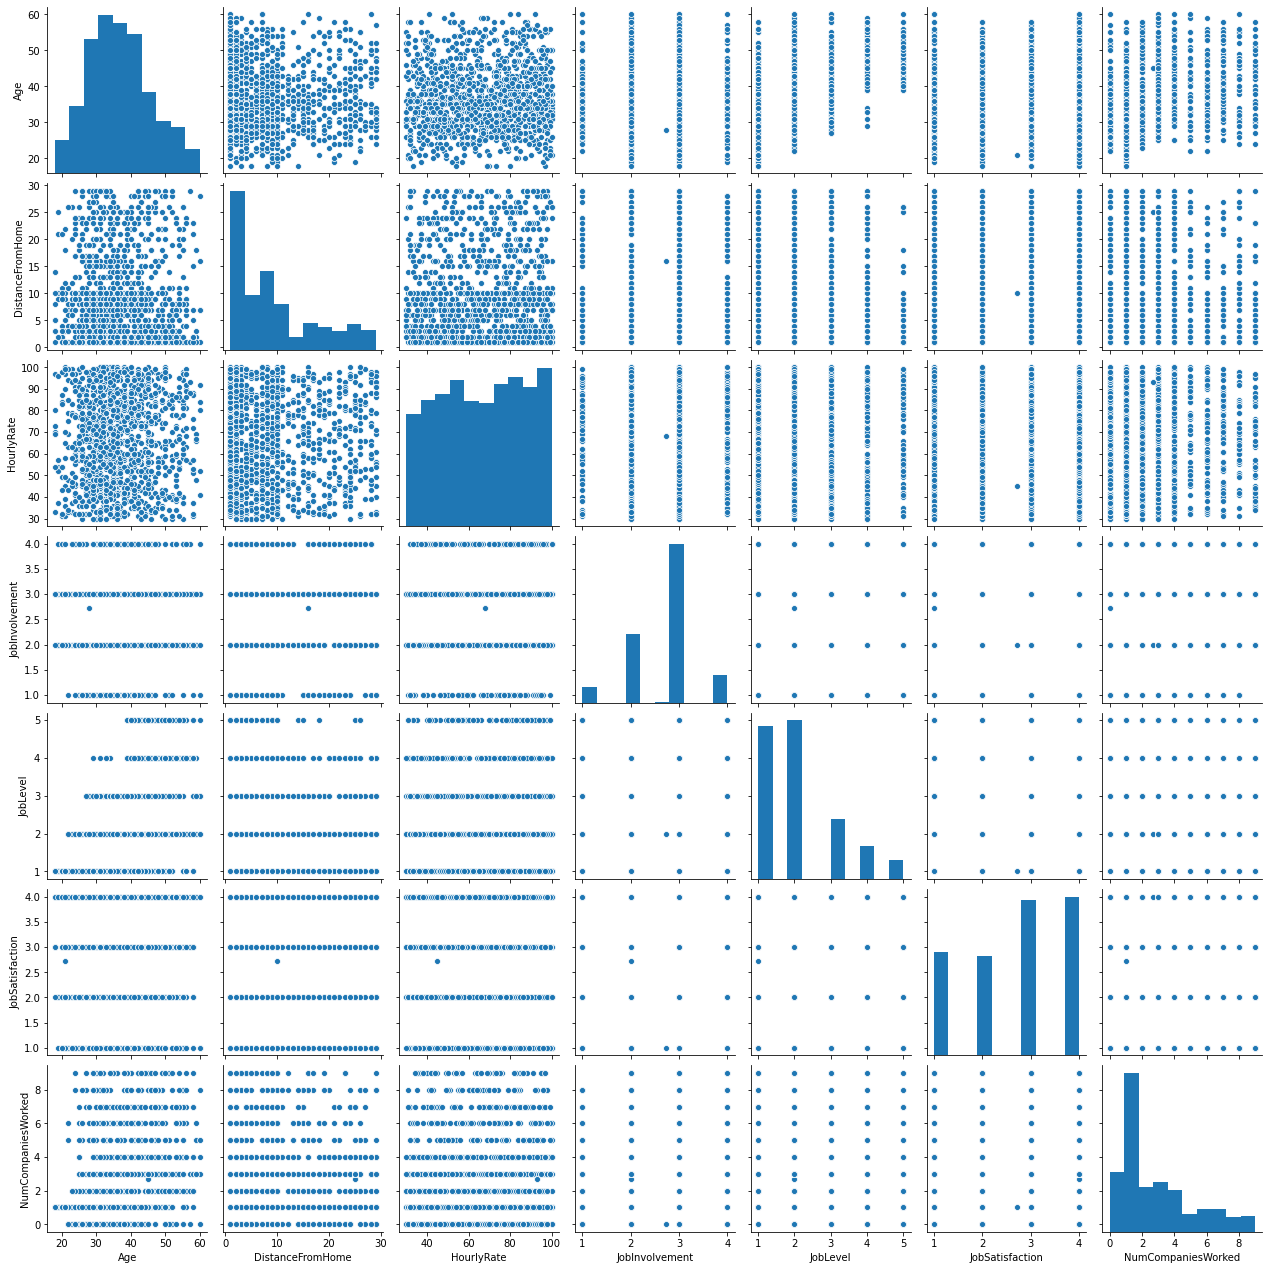

In [21]:
sns.pairplot(pe[numeric_columns])

0    1033
1     197
Name: Attrition, dtype: int64


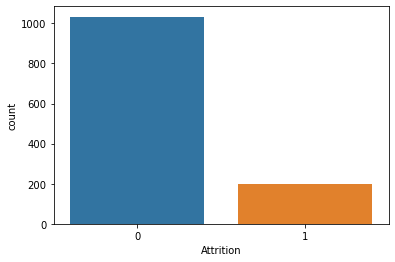

In [22]:
y = pe["Attrition"]

sns.countplot(y)

target_temp = pe.Attrition.value_counts()

print(target_temp)

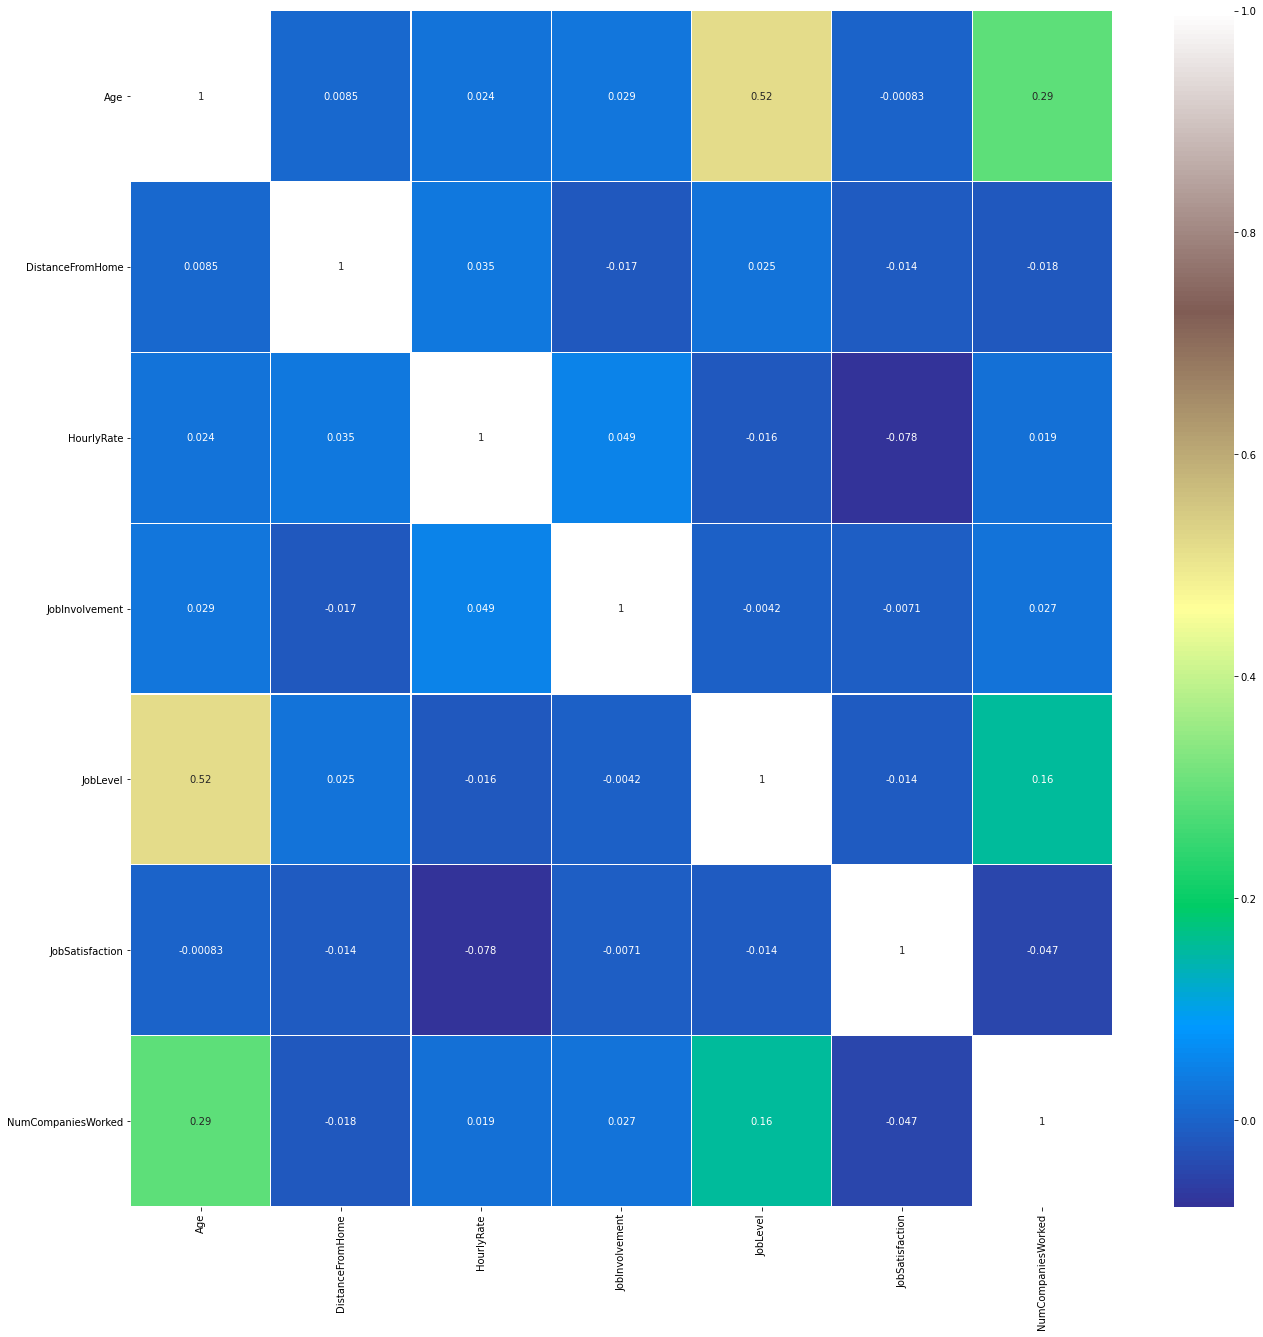

In [23]:
# create a correlation heatmap
sns.heatmap(pe[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(22,22)
plt.show()

In [24]:
#Print all of the object data types and their unique values
for column in pe.columns:
    if pe[column].dtype == object:
        print(str(column) + ' : ' + str(pe[column].unique()))
        print(pe[column].value_counts())
        print("_________________________________________________________________")


BusinessTravel : ['Travel_Rarely' 'Non-Travel' 'Travel_Frequently']
Travel_Rarely        872
Travel_Frequently    232
Non-Travel           126
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Human Resources' 'Research & Development' 'Sales']
Research & Development    794
Sales                     380
Human Resources            56
Name: Department, dtype: int64
_________________________________________________________________
Gender : ['Male' 'Female']
Male      740
Female    490
Name: Gender, dtype: int64
_________________________________________________________________
JobRole : ['Human Resources' 'Healthcare Representative' 'Manager'
 'Research Scientist' 'Laboratory Technician' 'Manufacturing Director'
 'Sales Executive' 'Research Director' 'Sales Representative']
Sales Executive              279
Research Scientist           236
Laboratory Technician        209
Manufacturing Director       121
Healthcare Representat

In [25]:
pe.corr()

,ID,Age,DailyRate,DistanceFromHome,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,FormalWarnings,ProjectsContributed,Attrition,YearsAtCompany
ID,1.000000,0.015709,-0.030198,0.014605,-0.033235,-0.024856,-0.004617,-0.038251,-0.001927,-0.031161,...,-0.010790,-0.003491,-0.028766,0.041753,0.047875,0.032228,NaN,-0.015763,0.044866,0.040994
Age,0.015709,1.000000,0.002536,0.008483,0.024418,0.029057,0.516879,-0.000831,0.504231,0.036068,...,0.009872,0.025116,-0.006717,0.216838,0.223647,0.207540,NaN,-0.017716,-0.160537,0.308893
DailyRate,-0.030198,0.002536,1.000000,-0.000695,0.041986,0.057585,-0.002008,0.041826,0.003593,-0.046623,...,-0.024235,0.016429,-0.028051,0.000575,-0.047440,-0.016368,NaN,0.776529,-0.051188,-0.031989
DistanceFromHome,0.014605,0.008483,-0.000695,1.000000,0.034705,-0.017362,0.025069,-0.013684,-0.005163,0.025871,...,0.037181,-0.021236,-0.009684,0.025124,0.020571,0.007026,NaN,-0.026558,0.075607,0.010036
HourlyRate,-0.033235,0.024418,0.041986,0.034705,1.000000,0.048808,-0.015739,-0.078044,-0.002233,-0.002299,...,0.032488,-0.062600,0.000164,-0.016850,-0.017993,-0.019223,NaN,-0.499552,-0.014932,-0.016021
JobInvolvement,-0.024856,0.029057,0.057585,-0.017362,0.048808,1.000000,-0.004247,-0.007119,-0.011239,0.013216,...,-0.020037,-0.021626,-0.016843,0.017137,-0.012566,0.039198,NaN,0.029605,-0.097830,-0.012652
JobLevel,-0.004617,0.516879,-0.002008,0.025069,-0.015739,-0.004247,1.000000,-0.014106,0.950275,0.033111,...,-0.040120,0.014031,0.041281,0.365356,0.327081,0.350972,NaN,0.015482,-0.170628,0.521521
JobSatisfaction,-0.038251,-0.000831,0.041826,-0.013684,-0.078044,-0.007119,-0.014106,1.000000,-0.017637,-0.005242,...,-0.039620,-0.017965,-0.012012,-0.011447,-0.027844,-0.043690,NaN,0.083086,-0.120280,-0.019669
MonthlyIncome,-0.001927,0.504231,0.003593,-0.005163,-0.002233,-0.011239,0.950275,-0.017637,1.000000,0.029165,...,-0.038586,0.005327,0.032626,0.341279,0.319829,0.321049,NaN,0.012848,-0.162073,0.503314
MonthlyRate,-0.031161,0.036068,-0.046623,0.025871,-0.002299,0.013216,0.033111,-0.005242,0.029165,1.000000,...,-0.002093,0.056913,0.020183,0.004542,0.025198,-0.032914,NaN,-0.047699,-0.002527,-0.016200


In [26]:
pe.shape

(1230, 44)

In [27]:
pe = pe.drop('ID',axis=1);

In [28]:
pe = pe.drop('Over18',axis=1);


In [29]:
pe = pe.drop('StandardHours', axis = 1)


In [30]:
pe = pe.drop('PerformanceRating', axis = 1)


In [31]:
pe = pe.drop('Behaviour', axis = 1)


In [32]:
pe = pe.drop('EmployeeCount', axis = 1)


In [33]:
pe = pe.drop('FormalWarnings', axis = 1)


In [34]:
pe.shape

(1230, 37)

In [35]:
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for column in pe.columns:
        if pe[column].dtype == np.number:
            continue
        pe[column] = LabelEncoder().fit_transform(pe[column])

In [36]:
pe.shape

(1230, 37)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [38]:
X,y=pe.loc[:,:'ProjectsContributed'],pe.loc[:,'YearsAtCompany']

In [39]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,...,TrainingTimesLastYear,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ProjectsContributed
0,44.0,2,1376.0,0,0,1,91.0,2.0,2,1,...,1,2.0,3,549,2.0,3.0,6,3.0,6,15.0
1,25.0,0,675.0,1,4,1,85.0,4.0,1,0,...,2,2.0,1,27,2.0,3.0,3,1.0,5,7.0
2,57.0,2,210.0,2,28,1,56.0,2.0,3,3,...,3,3.0,2,184,1.0,2.0,0,0.0,0,3.0
3,47.0,2,1180.0,1,24,1,84.0,3.0,2,0,...,3,3.0,3,1174,1.0,3.0,14,12.0,11,14.0
4,22.0,2,391.0,1,6,1,75.0,3.0,0,6,...,2,1.0,1,1099,4.0,3.0,0,0.0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,29.0,2,806.0,1,6,0,39.0,3.0,0,2,...,2,3.0,5,692,2.0,3.0,7,7.0,7,20.0
1226,41.0,2,582.0,1,27,0,60.0,2.0,3,4,...,3,4.0,1,1205,1.0,3.0,7,0.0,10,9.0
1227,36.0,2,1456.0,2,12,1,96.0,2.0,1,7,...,3,5.0,2,996,2.0,3.0,2,2.0,2,15.0
1228,23.0,2,885.0,1,3,1,58.0,4.0,0,6,...,3,3.0,3,276,1.0,4.0,2,0.0,2,15.0


In [40]:
y

0       20
1        6
2        1
3       17
4        1
        ..
1225     7
1226    20
1227     2
1228     3
1229    10
Name: YearsAtCompany, Length: 1230, dtype: int32

In [41]:
#Split the Dataset into Training and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [42]:
#Import the Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor 
  
#Create a Random Forest regressor object from Random Forest Regressor class
RFcl = RandomForestRegressor(n_estimators = 100)
  
#Fit the random forest regressor with training data represented by X_train and y_train
RFcl.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [43]:
#Predicted Height from test dataset w.r.t Random Forest Regression
y_predict = RFcl.predict((X_test))


In [44]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.885
Mean Squared Error: 2.6910890243902443
Root Mean Squared Error: 1.6404539080358962


In [45]:
RFcl.score(X_train, y_train)

0.9874919812742723

In [46]:
accuracy=RFcl.score(X_test,y_test)
print(accuracy*100,'%')

94.00245628546512 %


In [47]:
y_predict

array([ 4.83,  3.44,  6.86,  2.95,  9.  ,  0.74, 20.47, 10.14,  0.89,
        1.21, 14.98,  0.09,  7.27,  0.95,  5.15,  4.  , 18.6 , 10.46,
       11.6 ,  8.02,  5.38,  0.61,  3.16, 22.61,  2.97,  6.64,  9.98,
        4.65,  2.94,  0.91,  2.37,  4.62, 11.22,  3.03,  0.77, 15.1 ,
        0.92,  9.31,  9.07,  0.66,  7.28,  5.45,  9.93, 13.16,  7.63,
        0.77, 16.64,  4.74,  2.49, 10.04,  9.89,  0.8 ,  1.04, 28.51,
       12.39,  4.95,  7.87,  4.87, 20.84,  2.35,  7.43,  4.53,  2.93,
       13.15,  2.25, 15.26,  3.17,  5.27, 19.46, 20.69,  5.26,  9.03,
        0.27,  0.82,  8.2 ,  8.66,  4.78,  4.92,  7.53,  0.98,  9.2 ,
        3.39,  3.15,  0.87,  2.77,  9.06, 10.09,  9.31,  2.34,  4.46,
        3.  ,  4.86,  2.3 ,  8.11,  3.73,  0.98,  5.02,  4.99,  0.98,
       16.85,  5.22,  1.21,  5.66, 28.6 , 10.46,  3.73, 14.72,  0.83,
        8.4 ,  5.04,  0.85,  7.88,  7.99,  3.29,  1.22,  6.15,  9.02,
        4.79,  4.9 , 30.11,  5.  , 11.49,  9.53,  4.58,  3.19, 18.44,
        3.6 ,  9.02,

In [48]:
print("Feature importances:\n{}".format(RFcl.feature_importances_))

Feature importances:
[0.00855957 0.00043081 0.00179283 0.00071135 0.0019198  0.00039267
 0.00228471 0.00110623 0.00065981 0.00200782 0.00138295 0.0005321
 0.00489672 0.00864424 0.03777265 0.00058111 0.00221409 0.00112549
 0.00348545 0.00121153 0.00128799 0.00552666 0.00078215 0.00070743
 0.20573326 0.00136442 0.00346253 0.00129137 0.00372825 0.00297687
 0.0005401  0.38080058 0.02535406 0.28323187 0.00150051]


In [49]:
len(RFcl.feature_importances_)

35

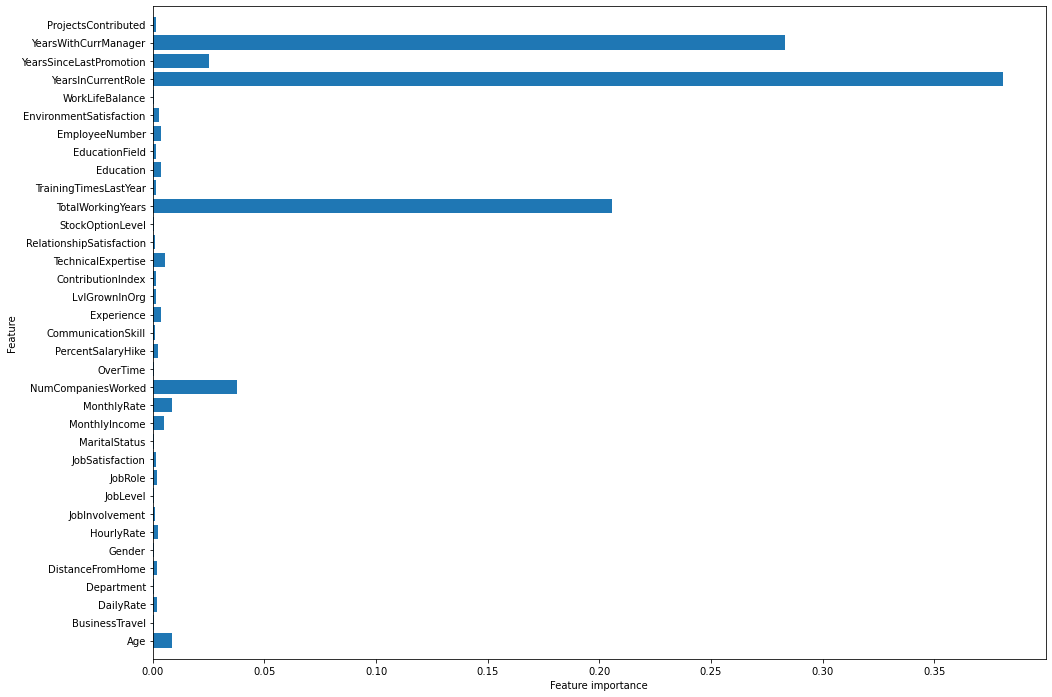

In [72]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(16,12))
    n_features = 35
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(RFcl)
plt.savefig('feature_importance')

In [51]:
pet=pd.read_csv(r'D:\KAGGLE EVENT\test.csv')


In [52]:
pet

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,...,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,FormalWarnings,ProjectsContributed
0,1,27,Travel_Rarely,591,Research & Development,2,Male,40,3,1,...,Medical,1,7.0,1,3,2,2,2,0,14.0
1,2,26,Travel_Rarely,1443,Sales,23,Female,47,2,2,...,Marketing,1,72.0,3,2,2,0,0,0,30.0
2,3,50,Travel_Rarely,328,Research & Development,1,Male,86,2,1,...,Medical,1,249.0,3,2,2,0,2,0,3.0
3,4,41,Travel_Rarely,1102,Sales,1,Female,94,3,2,...,Life Sciences,1,1.0,2,1,4,0,5,0,11.0
4,5,28,Travel_Rarely,440,Research & Development,21,Male,42,3,1,...,Medical,1,221.0,3,1,2,0,2,0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,59,Travel_Rarely,1324,Research & Development,3,Female,81,4,1,...,Medical,1,10.0,3,2,0,0,0,0,16.0
236,237,37,Travel_Rarely,1189,Sales,3,Male,87,3,3,...,Life Sciences,1,152.0,3,3,3,1,3,0,13.0
237,238,37,Non-Travel,1040,Research & Development,2,Male,100,2,2,...,Life Sciences,1,139.0,3,4,0,0,0,0,10.0
238,239,44,Non-Travel,489,Research & Development,23,Male,67,3,2,...,Medical,1,132.0,2,4,2,1,2,0,7.0


In [53]:
pet = pet.drop('Over18', axis = 1)


In [54]:
pet = pet.drop('Behaviour', axis = 1)


In [55]:
pet = pet.drop('EmployeeCount', axis = 1)


In [56]:
pet = pet.drop('FormalWarnings', axis = 1)


In [57]:
#pet = pet.drop('Behaviour', axis = 1)


In [58]:
pet = pet.drop('StandardHours', axis = 1)


In [59]:
pet = pet.drop('PerformanceRating', axis = 1)


In [60]:
pet = pet.drop('ID', axis = 1)

In [61]:
pet

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,...,TrainingTimesLastYear,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ProjectsContributed
0,27,Travel_Rarely,591,Research & Development,2,Male,40,3,1,Laboratory Technician,...,3,1,Medical,7.0,1,3,2,2,2,14.0
1,26,Travel_Rarely,1443,Sales,23,Female,47,2,2,Sales Executive,...,2,3,Marketing,72.0,3,2,2,0,0,30.0
2,50,Travel_Rarely,328,Research & Development,1,Male,86,2,1,Laboratory Technician,...,2,3,Medical,249.0,3,2,2,0,2,3.0
3,41,Travel_Rarely,1102,Sales,1,Female,94,3,2,Sales Executive,...,0,2,Life Sciences,1.0,2,1,4,0,5,11.0
4,28,Travel_Rarely,440,Research & Development,21,Male,42,3,1,Research Scientist,...,2,3,Medical,221.0,3,1,2,0,2,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,59,Travel_Rarely,1324,Research & Development,3,Female,81,4,1,Laboratory Technician,...,3,3,Medical,10.0,3,2,0,0,0,16.0
236,37,Travel_Rarely,1189,Sales,3,Male,87,3,3,Sales Executive,...,3,3,Life Sciences,152.0,3,3,3,1,3,13.0
237,37,Non-Travel,1040,Research & Development,2,Male,100,2,2,Healthcare Representative,...,2,2,Life Sciences,139.0,3,4,0,0,0,10.0
238,44,Non-Travel,489,Research & Development,23,Male,67,3,2,Laboratory Technician,...,3,3,Medical,132.0,2,4,2,1,2,7.0


In [62]:
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for column in pet.columns:
        if pet[column].dtype == np.number:
            continue
        pet[column] = LabelEncoder().fit_transform(pet[column])

In [63]:
pet.fillna(pet.mean(),inplace=True)

In [64]:
z = RFcl.predict(pet)

In [65]:
z.shape

(240,)

In [66]:
sub = pd.read_csv('D:/kaggle event/subm.csv')
predicting  = RFcl.predict(pet)
sub['tar']=predicting.astype(int)
sub.to_csv('subm.csv',index=False)

In [67]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
print(regressor.intercept_)

4.03431285213439


In [69]:
print(regressor.coef_)

[-3.66205443e-02 -4.17636195e-02 -4.17358041e-04 -1.52183018e-01
 -3.56698722e-03 -6.83102988e-02 -7.01178129e-03 -2.21928445e-01
  6.55808104e-01 -8.18541893e-03  4.50602823e-02 -2.63473215e-01
 -8.65365438e-04 -1.76919007e-05 -2.16578025e-01 -1.13647739e-02
 -3.05309154e-02 -7.10753575e-02  4.23892858e-04  1.33596889e-02
  1.24789546e-03 -2.48645618e-02  7.43068440e-02 -2.62310768e-01
  1.72753312e-01  8.99514259e-02  4.63389219e-02 -7.28326243e-02
  2.45690097e-04 -9.51944544e-02 -1.37939080e-01  5.43325475e-01
  2.63230132e-01  6.30372540e-01 -1.97073414e-02]


In [70]:
y_pred = regressor.predict(X_test)

In [71]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.9975870459029652
Mean Squared Error: 10.466941222667389
Root Mean Squared Error: 3.2352652476524066
